# Understanding recurrent neural networks

### Numpy implementation of a simple RNN

In [1]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64

In [4]:
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t)+np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs)

In [10]:
inputs.shape

(100, 32)

In [9]:
W.shape

(64, 32)

In [17]:
output_t.shape 

(64,)

In [16]:
final_output_sequence.shape

(6400,)

### A recurrent layer in Keras

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

In [18]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [19]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [20]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### Preparing the IMDB data

In [21]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [22]:
max_features = 10000
maxlen = 500
batch_size = 32

In [24]:
# load the data
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old

In [25]:
len(train_data) # length of train data

25000

In [26]:
len(test_data) # length of test data

25000

In [31]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [28]:
input_train = sequence.pad_sequences(train_data, maxlen = maxlen)
input_test = sequence.pad_sequences(test_data, maxlen=maxlen)

In [29]:
input_train.shape 

(25000, 500)

In [32]:
input_test.shape

(25000, 500)

In [33]:
print(input_train[0]) # if the words are less than 500, 0 will be used to fill the matirx

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### Training the model with Embedding and SimpleRNN layers

In [35]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels, epochs=10, batch_size=128, validation_split=0.2)
model.summary()

/Users/david/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/gradients_impl.py:111: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 20000 samples, validate on 5000 samples
Epoch 1/10


2022-09-06 17:05:39.391547: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


20000/20000 [==============================] - 16s 815us/step - loss: 0.6100 - acc: 0.6476 - val_loss: 0.5063 - val_acc: 0.7622
Epoch 2/10
20000/20000 [==============================] - 16s 819us/step - loss: 0.3877 - acc: 0.8366 - val_loss: 0.4155 - val_acc: 0.8242
Epoch 3/10
20000/20000 [==============================] - 16s 777us/step - loss: 0.2850 - acc: 0.8871 - val_loss: 0.4852 - val_acc: 0.7980
Epoch 4/10
20000/20000 [==============================] - 16s 800us/step - loss: 0.2397 - acc: 0.9080 - val_loss: 0.3313 - val_acc: 0.8678
Epoch 5/10
20000/20000 [==============================] - 16s 806us/step - loss: 0.1949 - acc: 0.9262 - val_loss: 0.4163 - val_acc: 0.8500
Epoch 6/10
20000/20000 [==============================] - 16s 813us/step - loss: 0.1633 - acc: 0.9402 - val_loss: 0.4062 - val_acc: 0.8454
Epoch 7/10
20000/20000 [==============================] - 17s 840us/step - loss: 0.1264 - acc: 0.9560 - val_loss: 0.3914 - val_acc: 0.8558
Epoch 8/10
20000/20000 [==============

In [37]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

In [39]:
epochs = range(1, len(loss)+1)

In [41]:
import matplotlib.pyplot as plt

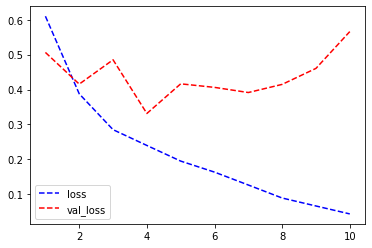

In [45]:
plt.plot(epochs, loss, '--b', label = 'loss')
plt.plot(epochs, val_loss, '--r',label='val_loss' )
plt.legend();

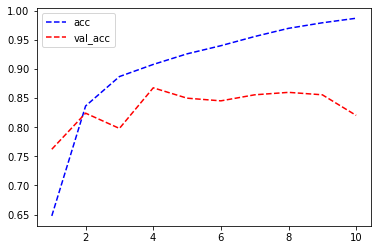

In [46]:
plt.plot(epochs, acc, '--b', label = 'acc')
plt.plot(epochs, val_acc, '--r',label='val_acc' )
plt.legend();

In [47]:
model.evaluate(input_test, test_labels) #82% accuracy 

25000/25000 [==============================] - 16s 626us/step


[0.5715263705539704, 0.82292]